<a href="https://colab.research.google.com/github/JuliRuiz11/PROGCOM-B/blob/main/GP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import random
import os

class PiedraPapeloTijera:
    def _init_(self, root):
        self.root = root
        self.root.title("Piedra, Papel o Tijera Extendido")
        self.opciones_clasico = [
            ("Piedra", "🪨"),
            ("Papel", "📄"),
            ("Tijera", "✂")
        ]
        self.opciones_extendido = [
            ("Piedra", "🪨"), ("Papel", "📄"), ("Tijera", "✂"),
            ("Lagarto", "🦎"), ("Spock", "🖖"), ("Pistola", "🔫"),
            ("Ninja", "🥷"), ("Pirata", "🏴‍☠"), ("Meteorito", "☄"),
            ("Carro", "🚗"), ("Lámpara", "💡"),
        ]
        self.ganados = 0
        self.perdidos = 0
        self.empates = 0
        self.seleccionar_modo()

    def seleccionar_modo(self):
        self.modo_ventana = tk.Toplevel(self.root)
        self.modo_ventana.title("Selecciona el modo de juego")
        self.modo_ventana.configure(bg="#f0f4ff")
        tk.Label(self.modo_ventana, text="Elige el modo de juego:", font=("Arial", 14), bg="#f0f4ff").pack(pady=10)
        tk.Button(self.modo_ventana, text="Clásico", width=15, font=("Arial", 12),
                  command=lambda: self.iniciar_juego('clasico')).pack(pady=5)
        tk.Button(self.modo_ventana, text="Extendido", width=15, font=("Arial", 12),
                  command=lambda: self.iniciar_juego('extendido')).pack(pady=5)

    def iniciar_juego(self, modo):
        self.modo_ventana.destroy()
        self.choices = self.opciones_clasico if modo == 'clasico' else self.opciones_extendido
        self.ventana_juego()

    def ventana_juego(self):
        bg_color = "#e0e7ff"
        frame_color = "#c7d2fe"
        self.root.configure(bg=bg_color)

        self.resultado = tk.Label(self.root, text="", font=("Arial", 18, "bold"), bg=bg_color)
        self.resultado.pack(pady=(10, 10))

        tk.Label(self.root, text="Elige tu opción:", font=("Arial", 14), bg=bg_color).pack(pady=10)

        self.botones = tk.Frame(self.root, bg=frame_color)
        self.botones.pack()

        for nombre, emoji in self.choices:
            img = self.cargar_imagen(nombre)
            if img:
                btn = tk.Button(self.botones, text=f"{emoji}\n{nombre}", image=img, compound="top",
                                command=lambda n=nombre: self.jugar(n), bg=frame_color)
                btn.image = img
            else:
                btn = tk.Button(self.botones, text=f"{emoji} {nombre}", width=12,
                                command=lambda n=nombre: self.jugar(n), bg=frame_color)
            btn.pack(side=tk.LEFT, padx=5, pady=10)

        self.marcador = tk.Label(self.root, text="Victorias: 0 | Derrotas: 0 | Empates: 0",
                                 font=("Arial", 12), bg=bg_color)
        self.marcador.pack(pady=10)

    def cargar_imagen(self, nombre):
        ruta = os.path.join("img", f"{nombre}.png")
        if os.path.exists(ruta):
            img = Image.open(ruta).resize((60, 60))
            return ImageTk.PhotoImage(img)
        return None

    def jugar(self, eleccion_del_usuario):
        self.eleccion_del_usuario = eleccion_del_usuario
        bot_nombre, bot_emoji = random.choice(self.choices)
        self.bot = bot_nombre
        user_emoji = next(e for n, e in self.choices if n == eleccion_del_usuario)
        resultado = self.quien_gana()

        colores = {"Ganaste": "green", "Perdiste": "red", "Empate": "gray"}
        self.resultado.config(fg=colores[resultado])
        self.resultado.config(
            text=f"{resultado}\n\nElegiste: {user_emoji} {self.eleccion_del_usuario}\nBot eligió: {bot_emoji} {self.bot}"
        )

        if resultado == "Ganaste":
            self.ganados += 1
        elif resultado == "Perdiste":
            self.perdidos += 1
        else:
            self.empates += 1

        self.marcador.config(text=f"Victorias: {self.ganados} | Derrotas: {self.perdidos} | Empates: {self.empates}")
        messagebox.showinfo("Resultado", resultado)

    def quien_gana(self):
        reglas = {
            "Piedra":     ["Tijera", "Lagarto", "Pistola", "Meteorito", "Carro"],
            "Papel":      ["Piedra", "Spock", "Pistola", "Meteorito", "Carro"],
            "Tijera":     ["Papel", "Lagarto", "Pistola", "Ninja", "Carro"],
            "Lagarto":    ["Spock", "Papel", "Pistola", "Pirata", "Carro"],
            "Spock":      ["Tijera", "Piedra", "Pistola", "Ninja", "Carro"],
            "Pistola":    ["Spock", "Lagarto", "Tijera", "Pirata", "Carro"],
            "Ninja":      ["Pirata", "Papel", "Lagarto", "Pistola", "Carro"],
            "Pirata":     ["Papel", "Spock", "Meteorito", "Ninja", "Carro"],
            "Meteorito":  ["Piedra", "Tijera", "Lagarto", "Spock", "Carro"],
            "Carro":      ["Piedra", "Papel", "Tijera", "Lagarto", "Spock", "Pistola", "Ninja", "Pirata", "Meteorito"],
            "Lámpara":    ["Lagarto", "Ninja", "Pirata"],
            "Alien":      ["Spock", "Meteorito", "Carro"]
        }
        if self.eleccion_del_usuario == self.bot:
            return "Empate"
        elif self.bot in reglas.get(self.eleccion_del_usuario, []):
            return "Ganaste"
        else:
            return "Perdiste"

if _name_ == "_main_":
    root = tk.Tk()
    app = PiedraPapeloTijera(root)
    root.mainloop()

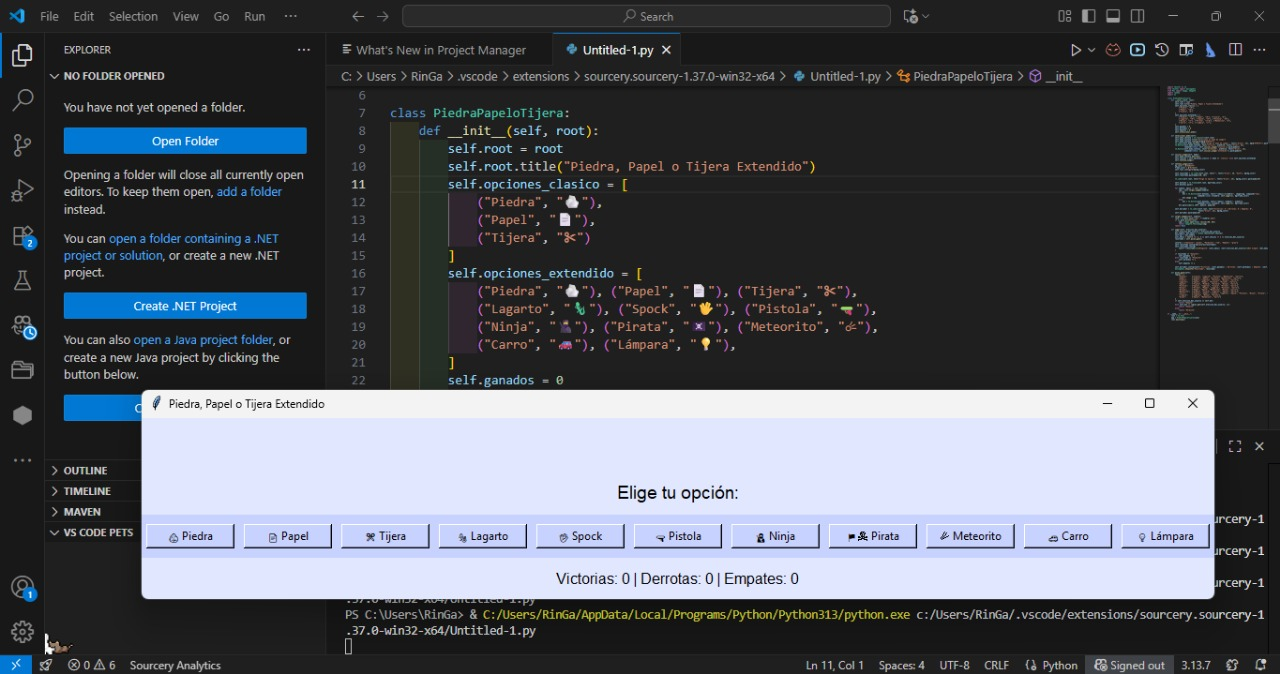